In [259]:
import pandas as pd

In [260]:
fact_booking = pd.read_csv("fact_bookings.csv")
fact_booking.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [261]:
fact_booking.shape

(134590, 12)

In [262]:
fact_booking.columns


Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [263]:
fact_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [264]:
fact_booking.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [265]:
fact_booking[["booking_date","check_in_date","checkout_date"]]

,booking_date,check_in_date,checkout_date
0,27-04-22,1/5/2022,2/5/2022
1,30-04-22,1/5/2022,2/5/2022
2,28-04-22,1/5/2022,4/5/2022
3,28-04-22,1/5/2022,2/5/2022
4,27-04-22,1/5/2022,2/5/2022
...,...,...,...
134585,29-07-22,31-07-22,3/8/2022
134586,30-07-22,31-07-22,1/8/2022
134587,30-07-22,31-07-22,2/8/2022
134588,29-07-22,31-07-22,1/8/2022


<Axes: ylabel='booking_platform'>

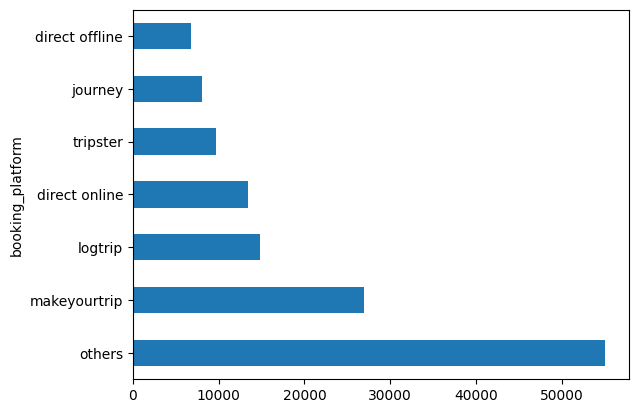

In [266]:
fact_booking.booking_platform.value_counts().plot(kind = "barh")


In [267]:
fact_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [268]:
fact_booking.revenue_generated.min(),fact_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [269]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")


In [270]:
df_hotels.shape

(25, 4)

In [271]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [272]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

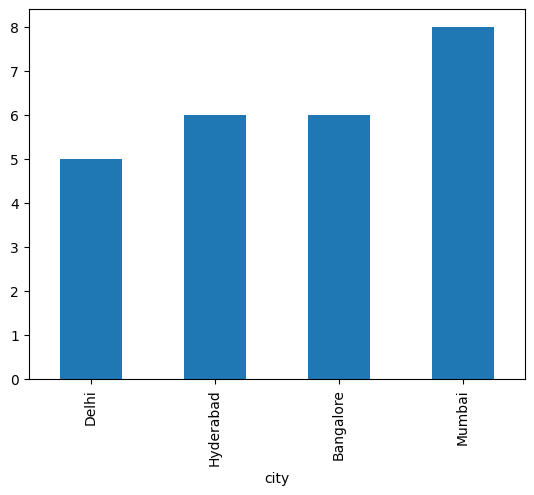

In [273]:
df_hotels.city.value_counts().sort_values().plot(kind = "bar")

In [274]:
                                                                EXERCISE

NameError: name 'EXERCISE' is not defined

In [275]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [276]:
df_agg_bookings.property_id.unique

<bound method Series.unique of 0       16559
1       19562
2       19563
3       17558
4       16558
        ...  
9195    16563
9196    16559
9197    17558
9198    19563
9199    17561
Name: property_id, Length: 9200, dtype: int64>

In [277]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [278]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [279]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [280]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [281]:
                                                        DATA CLEANING

SyntaxError: invalid syntax (2245908966.py, line 1)

In [282]:
df_booking = pd.read_csv("fact_bookings.csv")
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [283]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [284]:
df_booking[df_booking.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [285]:
df_booking[df_booking.no_guests>0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [286]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [287]:
avg , std = df_booking.revenue_generated.mean(),df_booking.revenue_generated.std()

In [288]:
avg, std

(np.float64(15378.05412734973), np.float64(93036.03867095453))

In [289]:
higher_limit = avg + 3*std
higher_limit

np.float64(294486.17014021333)

In [290]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263730.06188551383)

In [291]:
df_booking[df_booking.revenue_generated> higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [292]:
df_booking = df_booking[df_booking.revenue_generated< higher_limit]
df_booking.shape

(134585, 12)

In [293]:
df_booking.revenue_realized.describe()

count    134585.000000
mean      12696.095025
std        6928.058192
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [294]:
higher_limit = df_booking.revenue_realized.mean() + 3*df_booking.revenue_realized.std()
higher_limit

np.float64(33480.26960155918)

In [295]:
df_booking[df_booking.revenue_realized> higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,31-07-22,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [296]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [297]:
df_booking[df_booking.room_category== "RT4"].revenue_realized.describe()

count    16073.000000
mean     23440.103652
std       9048.865206
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [298]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77905
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [299]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [300]:
df_agg_bookings.capacity.sum()

np.float64(232530.0)

In [301]:
mean,med = df_agg_bookings.capacity.mean(),df_agg_bookings.capacity.median()
mean,med


(np.float64(25.280495759947815), np.float64(25.0))

In [302]:
higher_limit = avg + 3*med
higher_limit

np.float64(15453.05412734973)

In [303]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263730.06188551383)

In [304]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.capacity< higher_limit]
df_booking.shape

(134585, 12)

In [305]:
higher_limit = df_agg_bookings.capacity.mean() + 3*df_agg_bookings.capacity.median()
higher_limit

np.float64(100.28049575994781)

In [306]:
df_agg_bookings[df_agg_bookings.capacity> higher_limit]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [307]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [308]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [309]:
df_agg_bookings.shape

(9198, 5)

In [310]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9192, 5)

In [311]:
                                            DATA TRANSFORMATION 

SyntaxError: invalid syntax (2140755644.py, line 1)

In [312]:
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [313]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368


In [314]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x: round(x*100,2))

In [315]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74


# What is an average occupancy rate in each of the room categories ?

In [316]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    57.88
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [317]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [318]:
df = pd.merge(df_agg_bookings, df_rooms , left_on = "room_category", right_on = "room_id")
df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9188,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9189,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9190,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9191,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [319]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.88
Name: occ_pct, dtype: float64

In [320]:
df.drop("room_id",axis = 1, inplace =  True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


# Q.2 Print average occupancy rate per city

In [321]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [322]:
df = pd.merge(df,df_hotels, on  = "property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


<Axes: xlabel='city'>

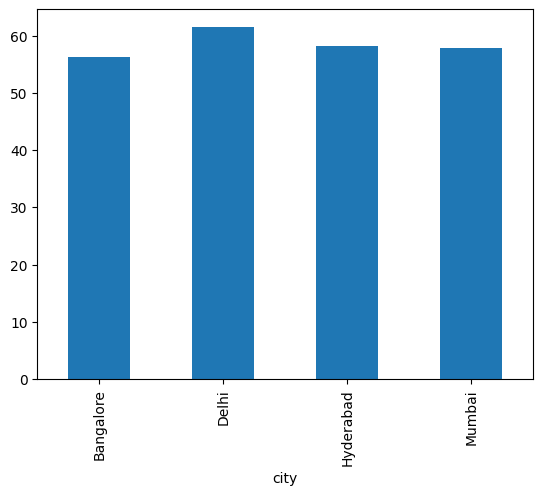

In [323]:
df.groupby("city")["occ_pct"].mean().plot(kind = "bar")

#  Q.3 When was the occupancy better ? Weekday or Weekend ? 

In [324]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [325]:
df = pd.merge(df,df_date, left_on = "check_in_date" , right_on = "date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [326]:
df.groupby("day_type")["occ_pct"].mean()

day_type
weekeday    50.883140
weekend     72.343625
Name: occ_pct, dtype: float64

# Q.4 In the month of June , What is the occupancy for different cities

In [327]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [328]:
df_June_22 = df[df["mmm yy"] == "Jun 22"]
df_June_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [329]:
df_June_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

In [330]:
df_august = pd.read_csv("new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [331]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [332]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [333]:
latest_df = pd.concat([df , df_august], ignore_index = True, axis = 0)
latest_df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


# Q.6 Print revenue realized per city

In [334]:
df_booking.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [335]:
df = pd.merge(df_hotels , df_booking , on = "property_id")
df.tail(4)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134581,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT47,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134582,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT48,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134583,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT49,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300
134584,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT410,31-07-22,31-07-22,1/8/2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920


In [336]:
df.groupby("city")["revenue_realized"].sum().round(2)

city
Bangalore    420397050
Delhi        294466018
Hyderabad    325232870
Mumbai       668608011
Name: revenue_realized, dtype: int64

# Q.7 Print month by month revenue

In [337]:
df.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT14,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [338]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [339]:
df_date.head(3)


,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [340]:
pd.merge(df,df_date, left_on = "check_in_date" , right_on = "date")

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type


In [341]:
df_date["date"] = pd.to_datetime(df_date["date"]) 
df_date.head(3)

C:\Users\mehak\AppData\Local\Temp\ipykernel_16232\1123917927.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [342]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [353]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [351]:
df_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [352]:
df_booking.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [376]:
df = pd.merge(df_booking , df_hotels , on = "property_id")
df.head(4)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [377]:
df.groupby ("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66125495
Atliq Grands     211523664
Atliq Bay        260025978
Atliq Blu        260855522
Atliq City       285811939
Atliq Palace     304081863
Atliq Exotica    320279488
Name: revenue_realized, dtype: int64

In [378]:
df.groupby("city")["ratings_given"].mean().round(2).sort_values()

city
Bangalore    3.41
Mumbai       3.65
Hyderabad    3.66
Delhi        3.78
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

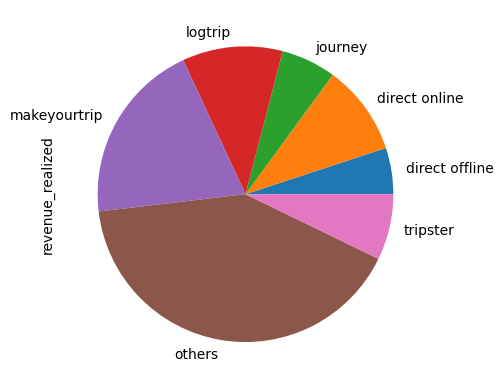

In [382]:
df.groupby("booking_platform")["revenue_realized"].sum(). plot (kind = "pie")